# 案例--加州房价预测

## 准备工作

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

### 获取数据函数

In [4]:
import os
import tarfile
import urllib
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

c:\Users\89556\.conda\envs\pydata\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### 查看数据

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


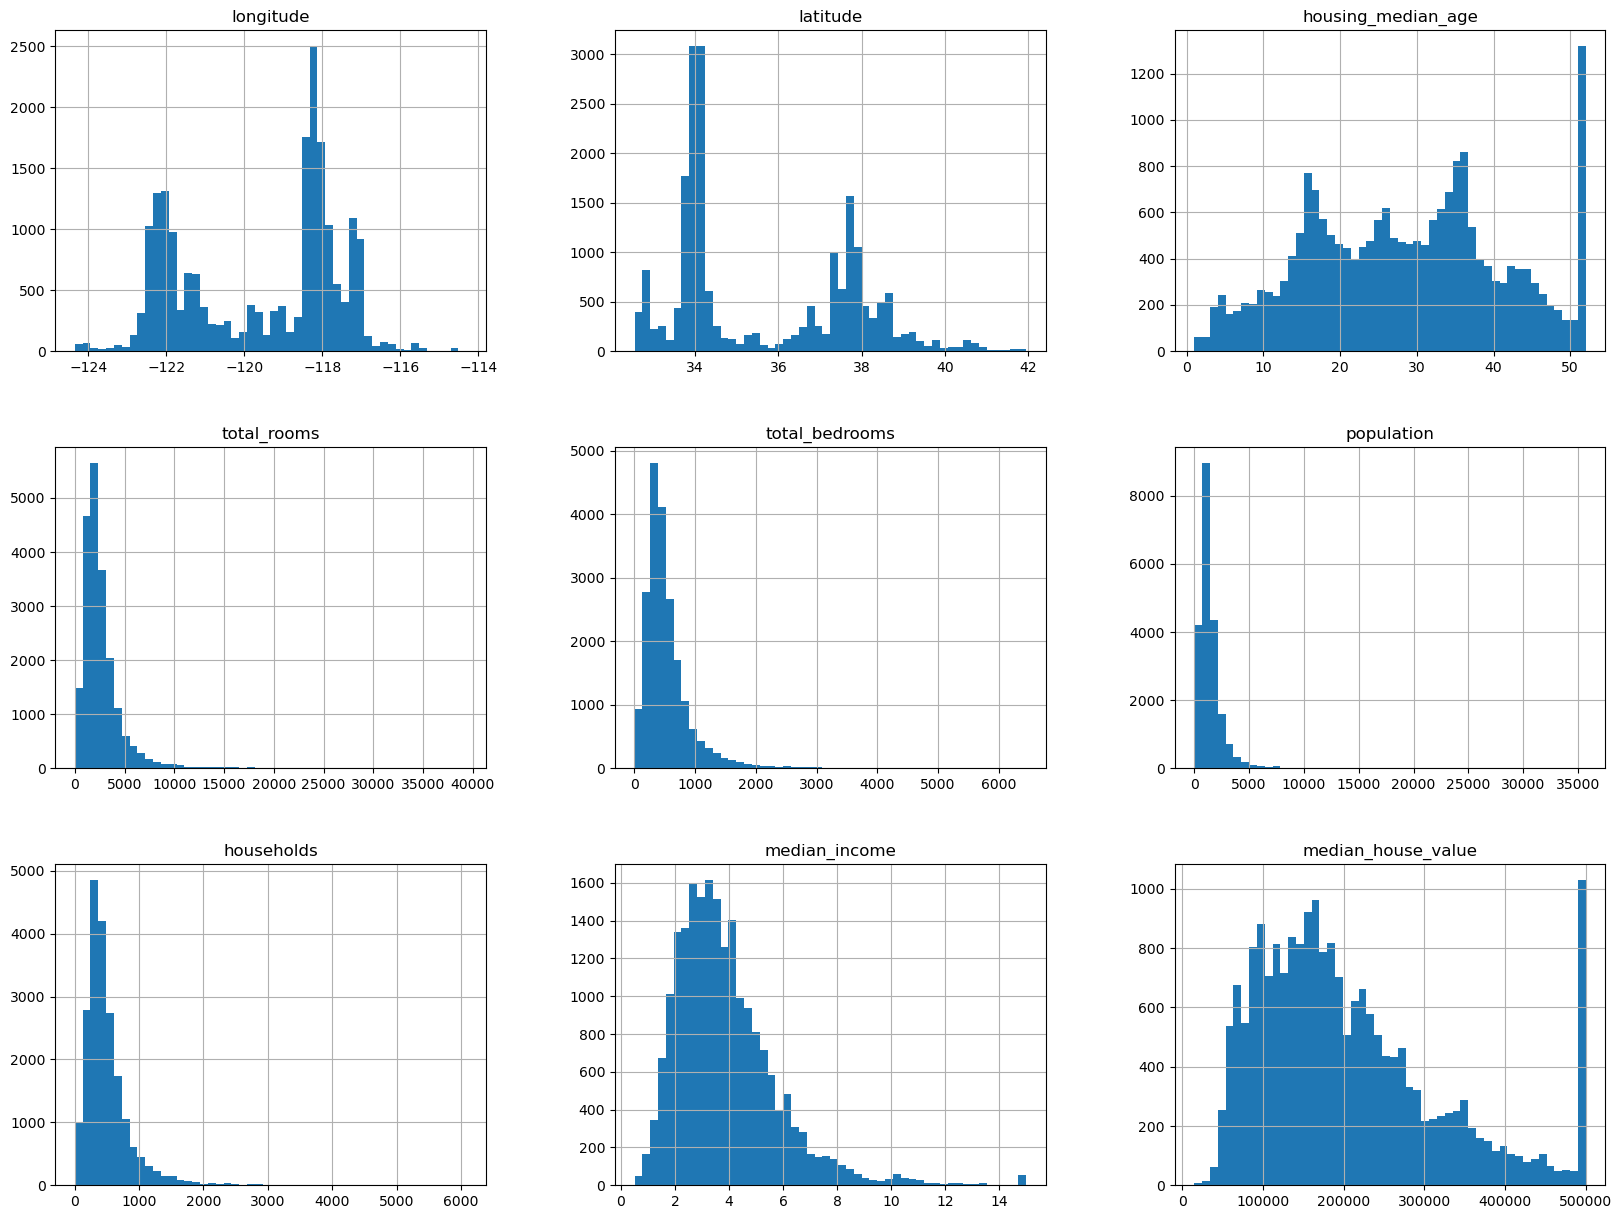

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### 创建测试集

In [11]:
import numpy as np

In [12]:
# 手动分割
def split_train_test(data, test_ratio, random_state=None):
    if random_state:
        np.random.seed(random_state)  # 设置随机种子以保证可重复性
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    if isinstance(data, np.ndarray):
        return data[train_indices], data[test_indices]
    else:
        return data.iloc[train_indices], data.iloc[test_indices]


In [13]:
train_set, test_set = split_train_test(housing, 0.2)

In [14]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15004,-117.05,32.75,29.0,2767.0,612.0,1437.0,587.0,2.8306,142900.0,NEAR OCEAN
11401,-117.93,33.72,17.0,4461.0,585.0,2095.0,580.0,7.6709,319500.0,<1H OCEAN
19740,-122.38,40.09,16.0,2077.0,388.0,1155.0,389.0,3.1361,84800.0,INLAND
6926,-118.08,34.01,32.0,1973.0,401.0,1322.0,386.0,3.4861,158100.0,<1H OCEAN
889,-121.95,37.55,21.0,10687.0,1540.0,4552.0,1520.0,6.6478,333400.0,<1H OCEAN


In [15]:
# sklearn自动分割
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


### 处理收入中位数

<Axes: >

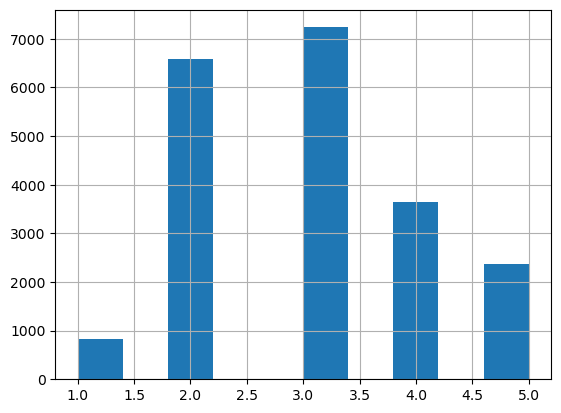

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.,1.5,3.0,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [18]:
# 根据收入类别分层抽样
from sklearn.model_selection import StratifiedShuffleSplit

In [19]:
# 设置分层抽样的参数
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# 根据 income_cat 进行分层抽样
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]  # 获取训练集
    strat_test_set = housing.loc[test_index]    # 获取测试集

In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 数据可视化

In [22]:
# 读取训练集
housing = strat_train_set.copy()

#### 地理数据可视化

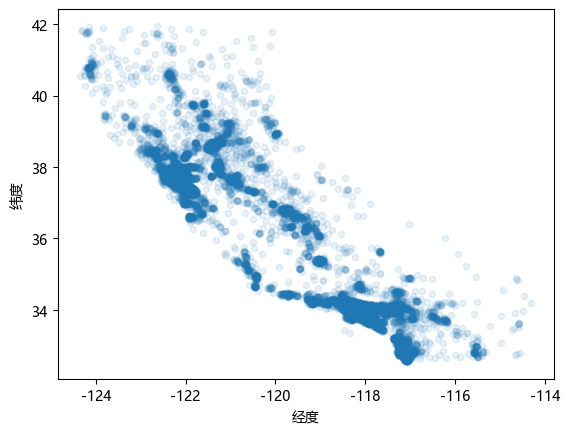

In [23]:
import matplotlib.pyplot as plt
import matplotlib
# 设置全局字体
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'  # 或者其他支持中文的字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

# 绘制散点图
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

# 设置中文标签
plt.xlabel("经度")
plt.ylabel("纬度")

# 显示图形
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

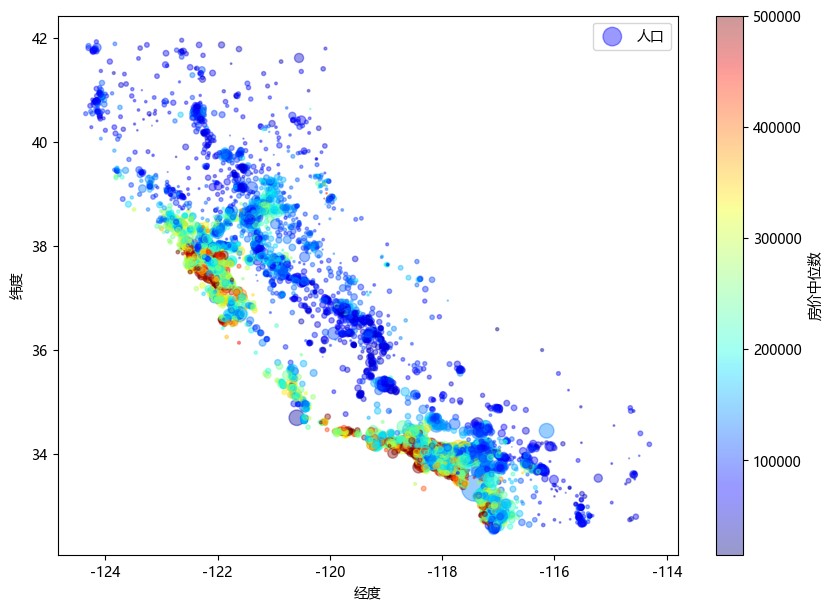

In [24]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 设置中文字体
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 根据系统实际情况选择字体路径
font = font_manager.FontProperties(fname=font_path)

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(10, 7))

# 使用scatter方法绘制散点图
scatter = ax.scatter(
    housing["longitude"], 
    housing["latitude"], 
    alpha=0.4,
    s=housing["population"] / 100,  # 点的大小与人口成比例（除以100）
    c=housing["median_house_value"],  # 点的颜色与房价中位数相关
    cmap='jet'                        # 使用“jet”色图
)

# 设置中文标签
ax.set_xlabel("经度", fontproperties=font)
ax.set_ylabel("纬度", fontproperties=font)

# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax)  # 将scatter对象传入
cbar.set_label("房价中位数", fontproperties=font)  # 设置颜色条的标签为“房价中位数”

# 添加图例
ax.legend(["人口"], prop=font)  # 添加图例时指定字体

# 显示图形
plt.show


## 寻找相关性

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [26]:
numeric_housing = housing.select_dtypes(include=[np.number])
corr_matrix = numeric_housing.corr()

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

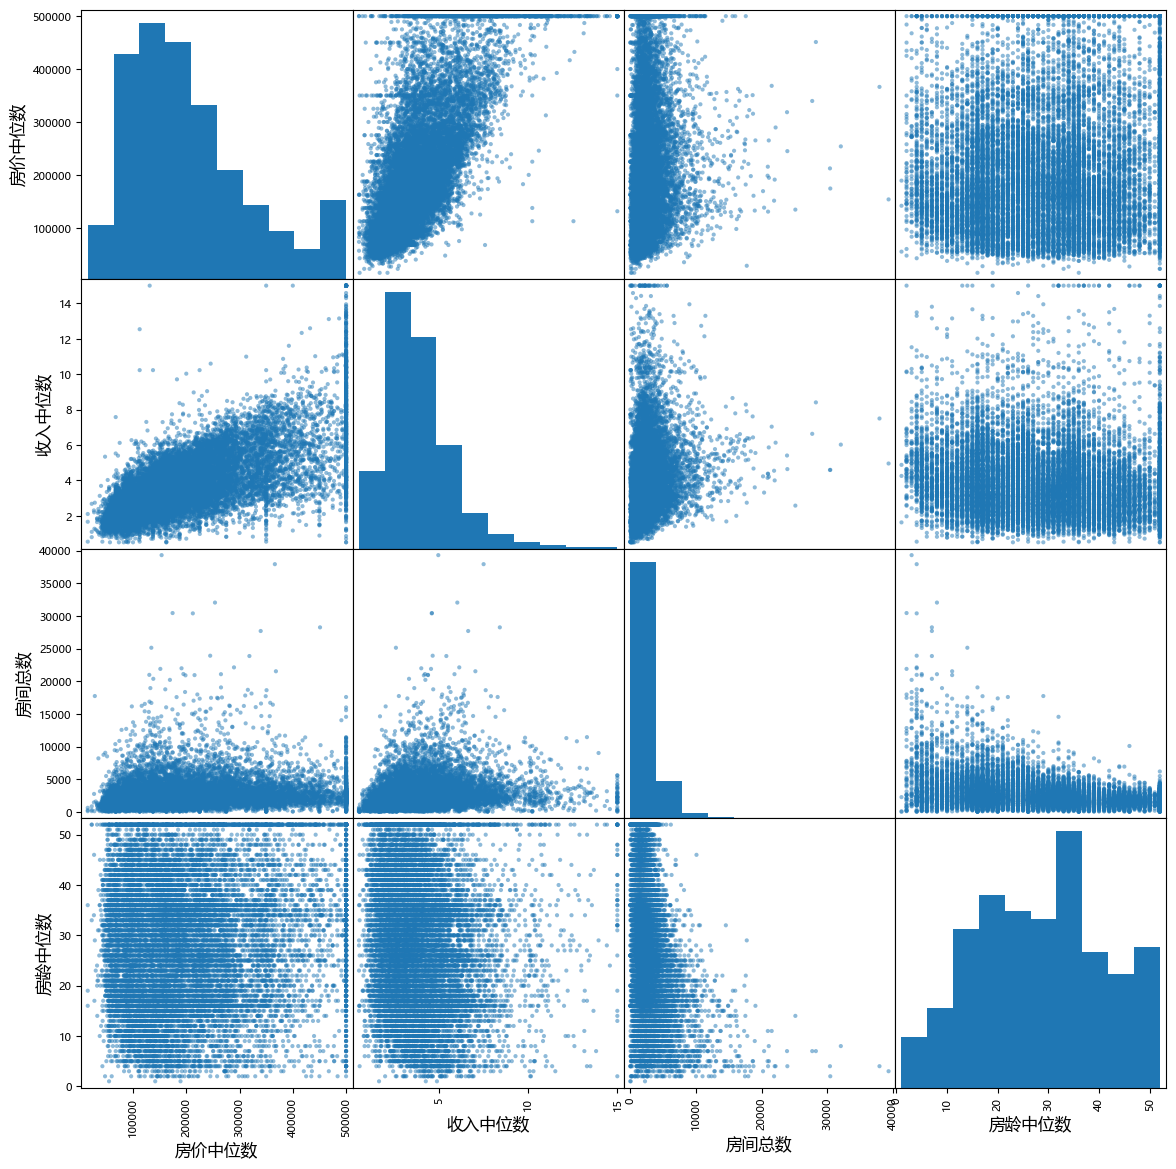

In [28]:
from pandas.plotting import scatter_matrix

# 定义中文标签
chinese_labels = {
    "median_house_value": "房价中位数",
    "median_income": "收入中位数",
    "total_rooms": "房间总数",
    "housing_median_age": "房龄中位数"
}

# 使用 scatter_matrix 画图
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(14, 14))

# 获取当前图形的所有子图
axes = plt.gcf().axes

# 遍历所有子图，替换每个子图的x轴和y轴标签
for i, label1 in enumerate(attributes):
    for j, label2 in enumerate(attributes):
        axes[i * len(attributes) + j].set_xlabel(chinese_labels[label2], fontsize=12)  # x轴
        axes[i * len(attributes) + j].set_ylabel(chinese_labels[label1], fontsize=12)  # y轴

plt.show()


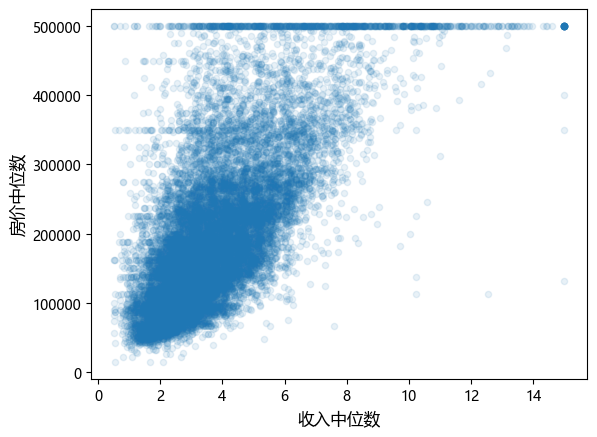

In [29]:
# 绘制散点图
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

# 设置中文标签
plt.xlabel("收入中位数", fontsize=12)  # X轴标签
plt.ylabel("房价中位数", fontsize=12)  # Y轴标签

# 显示图像
plt.show()

In [30]:
## 试验不同属性的组合
housing["room_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [31]:
# 查看相关矩阵
numeric_housing = housing.select_dtypes(include=[np.number])
corr_matrix = numeric_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
room_per_household          0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# 机器学习算法的数据准备

In [32]:
# 从 strat_train_set 中删除目标变量列，创建特征 DataFrame
housing = strat_train_set.drop("median_house_value", axis=1)

# 复制目标变量列，创建标签 Series
housing_labels = strat_train_set["median_house_value"].copy()

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


## 数据清理

In [33]:
# 处理缺失值
from sklearn.impute import SimpleImputer

# 创建 SimpleImputer 实例，指定填充策略
imputer = SimpleImputer(strategy='median')  # 这里以中位数填充为例

In [34]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [35]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [37]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [38]:
X = imputer.transform(housing_num)

In [39]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

## 处理文本和分类属性

In [40]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [41]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [42]:
# 查看每个类别的编码映射
print(ordinal_encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [43]:
# 独热编码
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [44]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [45]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 自定义转换器

In [46]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# 定义列的索引（假设你的数据集是NumPy数组或DataFrame转化而来的数组）
# 这些索引对应房间总数、卧室总数、人口总数和家庭总数
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# 创建一个自定义的特征添加器，继承自BaseEstimator和TransformerMixin
# 使它能够在scikit-learn的Pipeline中使用
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # 构造函数，允许用户指定是否添加"卧室与房间比"特征
        self.add_bedrooms_per_room = add_bedrooms_per_room  # 保存参数供后续使用

    def fit(self, X, y=None):
        # 由于该转换器不需要训练数据来计算任何参数，所以fit方法只返回self即可
        return self

    def transform(self, X):
        """
        该方法用于转换输入的数据X，添加新的特征：
        - 每户的房间数：房间总数/家庭总数
        - 每户的人口数：人口总数/家庭总数
        如果add_bedrooms_per_room为True，则还会添加：
        - 每间房的卧室数：卧室总数/房间总数
        """
        
        # 计算每户的房间数（房间总数 / 家庭总数）
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        
        # 计算每户的人口数（人口总数 / 家庭总数）
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        # 如果用户指定要添加卧室与房间比，则进行计算
        if self.add_bedrooms_per_room:
            # 计算每间房的卧室数（卧室总数 / 房间总数）
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            
            # 将原始数据和新计算出的特征按列组合，返回包含新特征的数组
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            # 如果不需要添加卧室与房间比，只返回房间/家庭和人口/家庭特征
            return np.c_[X, rooms_per_household, population_per_household]

# 实例化转换器，指定不添加"卧室与房间比"特征
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

# 假设housing是一个Pandas DataFrame，将其转换为NumPy数组并应用transform方法
# housing.values将DataFrame转换为NumPy数组
housing_extra_attribs = attr_adder.transform(housing.values)


# 打印前5行数据，查看新增的特征
print(housing_extra_attribs[:5])

[[-121.46 38.52 29.0 3873.0 797.0 2237.0 706.0 2.1736 'INLAND'
  5.485835694050992 3.168555240793201]
 [-117.23 33.09 7.0 5320.0 855.0 2015.0 768.0 6.3373 'NEAR OCEAN'
  6.927083333333333 2.6236979166666665]
 [-119.04 35.37 44.0 1618.0 310.0 667.0 300.0 2.875 'INLAND'
  5.3933333333333335 2.223333333333333]
 [-117.13 32.75 24.0 1877.0 519.0 898.0 483.0 2.2264 'NEAR OCEAN'
  3.886128364389234 1.8592132505175984]
 [-118.7 34.28 27.0 3536.0 646.0 1837.0 580.0 4.4964 '<1H OCEAN'
  6.096551724137931 3.1672413793103447]]


In [47]:
# 获取指定列名的索引，col_names 中定义了房间、卧室、人口、家庭的列名
col_names = "total_rooms", "total_bedrooms", "population", "households"

# 使用 housing.columns.get_loc(c) 获取每个列名的索引
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]  # 获取指定列的索引

# 将之前生成的包含额外特征的 NumPy 数组转换为 Pandas DataFrame
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,  # 包含新特征的数据
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],  # 添加新特征的列名
    index=housing.index  # 保持原有的行索引
)

# 显示新数据集的前 5 行
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## 特征缩放

## 转换流水线

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [49]:
from sklearn.compose import ColumnTransformer

# 定义数值特征的列名
num_attribs = list(housing_num)  # 将数值特征的列名转换为列表
# 定义类别特征的列名
cat_attribs = ["ocean_proximity"]  # 指定类别特征列名

# 创建一个 ColumnTransformer，用于同时处理数值特征和类别特征
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),  # 对数值特征使用之前定义的 num_pipeline
    ('cat', OneHotEncoder(), cat_attribs),  # 对类别特征使用 OneHotEncoder 进行独热编码
])

# 对原始数据进行预处理，得到预处理后的数据
housing_prepared = full_pipeline.fit_transform(housing)

# 选择和训练模型

## 训练和评估训练集

In [50]:
# 线性回归模型
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [51]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [52]:
print("预测值:",lin_reg.predict(some_data_prepared))

预测值: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [53]:
print("标签：",list(some_labels))

标签： [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [54]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018743

In [55]:
# 决策树模型
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = mean_squared_error(housing_labels, housing_predictions)
#过拟合
tree_rmse

0.0

## 使用交叉验证评估

In [56]:
# 导入交叉验证函数
from sklearn.model_selection import cross_val_score

# 使用交叉验证评估决策树模型
# 参数解释：
# 1. tree_reg: 决策树回归模型
# 2. housing_prepared: 预处理后的特征数据
# 3. housing_labels: 目标标签，即房价中位数
# 4. scoring="neg_mean_squared_error": 使用负均方误差作为评分方式（需要取负值转换回正的均方误差）
# 5. cv=10: 进行 10 折交叉验证
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

# 由于 cross_val_score 返回的是负均方误差，我们先取负值再计算平方根，得到 RMSE
tree_rmse_scores = np.sqrt(-scores)

# 定义一个函数用于显示交叉验证的评分结果
def display_scores(scores):
    print("Scores:", scores)  # 打印每一折的 RMSE 值
    print("Mean:", scores.mean())  # 打印所有折的 RMSE 平均值
    print("Standard deviation:", scores.std())  # 打印 RMSE 的标准差，衡量不同折间的波动情况

# 调用 display_scores 函数，显示 10 折交叉验证的结果
display_scores(tree_rmse_scores)


Scores: [72358.65068514 69758.95816993 68198.07900739 71195.94989159
 70198.857458   78573.61749734 71902.25438069 72683.95435135
 67581.48884992 70385.20955487]
Mean: 71283.70198462221
Standard deviation: 2901.480110640235


In [57]:
# 计算线性回归的评分
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180666


In [58]:
# 导入随机森林回归模型
from sklearn.ensemble import RandomForestRegressor

# 创建随机森林回归模型对象
forest_reg = RandomForestRegressor(n_estimators=100, n_jobs=-1)

# 使用交叉验证评估随机森林模型
# 参数解释：
# 1. forest_reg: 随机森林回归模型
# 2. housing_prepared: 预处理后的特征数据
# 3. housing_labels: 目标标签，即房价中位数
# 4. scoring="neg_mean_squared_error": 使用负均方误差作为评分方式（需要取负值转换回正的均方误差）
# 5. cv=10: 进行 10 折交叉验证
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)

# 由于 cross_val_score 返回的是负均方误差，我们先取负值再计算平方根，得到 RMSE
forest_rmse_scores = np.sqrt(-forest_scores)

# 定义一个函数用于显示交叉验证的评分结果
def display_scores(scores):
    print("Scores:", scores)  # 打印每一折的 RMSE 值
    print("Mean:", scores.mean())  # 打印所有折的 RMSE 平均值
    print("Standard deviation:", scores.std())  # 打印 RMSE 的标准差，衡量不同折间的波动情况

# 调用 display_scores 函数，显示 10 折交叉验证的结果
display_scores(forest_rmse_scores)


Scores: [51344.64780438 48708.48856429 46482.91508176 52002.23206604
 47624.3666069  52213.19343268 52258.92265701 49618.38216636
 48617.56549768 54069.6913844 ]
Mean: 50294.04052614927
Standard deviation: 2307.683618094615


## 保存模型

In [59]:
from sklearn.ensemble import RandomForestRegressor
from joblib import dump, load

# 训练模型
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

# 保存模型
dump(forest_reg, "random_forest_model.joblib")

# 加载模型
loaded_model = load("random_forest_model.joblib")

# 使用加载的模型进行预测
housing_predictions = loaded_model.predict(housing_prepared)


# 微调模型

## 网格搜索

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [61]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [62]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [63]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

63863.46091244546 {'max_features': 2, 'n_estimators': 3}
55447.16504279556 {'max_features': 2, 'n_estimators': 10}
52761.141673278325 {'max_features': 2, 'n_estimators': 30}
60234.94882427265 {'max_features': 4, 'n_estimators': 3}
53292.70786607605 {'max_features': 4, 'n_estimators': 10}
50472.32647864731 {'max_features': 4, 'n_estimators': 30}
59918.8010563893 {'max_features': 6, 'n_estimators': 3}
52291.08940965677 {'max_features': 6, 'n_estimators': 10}
50071.2344038297 {'max_features': 6, 'n_estimators': 30}
60031.9003357628 {'max_features': 8, 'n_estimators': 3}
52160.3479622401 {'max_features': 8, 'n_estimators': 10}
50160.03709658797 {'max_features': 8, 'n_estimators': 30}
63015.325948430436 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54320.09580411758 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60169.360716942945 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52613.15188540673 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

## 随机搜索

In [ ]:

# from sklearn.model_selection import RandomizedSearchCV

# # 定义参数分布
# param_dist = {
#     'n_estimators': np.random.randint(10, 200, size=50),  # 随机选择 10 到 200 之间的 50 个树的数量
#     'max_features': ['auto', 'sqrt', 'log2'],  # 特征选择方式
#     'max_depth': [None] + list(np.random.randint(1, 20, size=20)),  # 随机选择深度，包含无深度限制
#     'min_samples_split': np.random.randint(2, 20, size=50),  # 随机选择最小样本分割数
#     'min_samples_leaf': np.random.randint(1, 20, size=50),  # 随机选择最小样本叶节点数
#     'bootstrap': [True, False]  # 是否使用自助法
# }

# # 创建随机森林回归器
# forest_reg = RandomForestRegressor()

# # 创建随机搜索对象
# random_search = RandomizedSearchCV(forest_reg, param_distributions=param_dist,
#                                    n_iter=100, cv=5,
#                                    scoring='neg_mean_squared_error',
#                                    return_train_score=True,
#                                    random_state=42,
#                                    n_jobs=-1)  # 使用所有可用的 CPU 核心

# # 拟合随机搜索对象
# random_search.fit(housing_prepared, housing_labels)

# # 输出最佳参数和最佳评分
# print("最佳参数:", random_search.best_params_)
# print("最佳评分:", random_search.best_score_)

## 分析最佳模型及其误差

In [68]:
# 从最佳模型中获取特征的重要性
feature_importances = grid_search.best_estimator_.feature_importances_

feature_importances

array([7.54584576e-02, 6.69129439e-02, 3.89937011e-02, 1.89484386e-02,
       1.59562293e-02, 1.84709232e-02, 1.58580301e-02, 3.34856616e-01,
       7.33623841e-02, 1.08643721e-01, 6.40905332e-02, 1.38749638e-02,
       1.47118045e-01, 6.51482358e-05, 2.64093533e-03, 4.74892843e-03])

In [71]:
# 额外的特征
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

# 获取独热编码后的类别特征
cat_encoder = full_pipeline.named_transformers_["cat"]  # 获取列变换器中的类别编码器
cat_one_hot_attribs = list(cat_encoder.categories_[0])  # 提取类别特征的独热编码属性名称

# 将数值特征、额外特征和独热编码后的类别特征组合成一个完整的特征列表
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# 将特征重要性和特征名称进行排序，按重要性降序排列
sorted_features = sorted(zip(feature_importances, attributes), reverse=True)

# 输出排序后的特征重要性及其对应的特征名称
sorted_features

[(0.33485661616100415, 'median_income'),
 (0.14711804543797752, 'INLAND'),
 (0.10864372146885908, 'pop_per_hhold'),
 (0.07545845761728062, 'longitude'),
 (0.07336238408112776, 'rooms_per_hhold'),
 (0.06691294394485996, 'latitude'),
 (0.06409053321457826, 'bedrooms_per_room'),
 (0.038993701065230375, 'housing_median_age'),
 (0.018948438586886596, 'total_rooms'),
 (0.018470923199196063, 'population'),
 (0.01595622931565559, 'total_bedrooms'),
 (0.01585803008625644, 'households'),
 (0.01387496381854838, '<1H OCEAN'),
 (0.004748928433799774, 'NEAR OCEAN'),
 (0.0026409353329302056, 'NEAR BAY'),
 (6.514823580913457e-05, 'ISLAND')]

## 通过测试集评估系统

In [77]:
# 从网格搜索中获取最佳模型
final_model = grid_search.best_estimator_

# 准备测试集数据
X_test = strat_test_set.drop("median_house_value", axis=1)  # 去掉目标变量
y_test = strat_test_set["median_house_value"].copy()  # 获取目标变量的副本

# 对测试集进行预处理，应用之前定义的完整管道
X_test_prepared = full_pipeline.transform(X_test)

# 使用最佳模型进行预测
final_predictions = final_model.predict(X_test_prepared)

# 计算测试集上的均方误差和均方根误差
final_mse = mean_squared_error(y_test, final_predictions)  # 计算均方误差
final_rmse = np.sqrt(final_mse)  # 计算均方根误差

final_rmse

47753.556646802295

In [79]:
from scipy import stats  # 导入 SciPy 的统计模块

# 设置置信水平
confidence = 0.95

# 计算平方误差
squared_errors = (final_predictions - y_test) ** 2

# 计算置信区间
confidence_interval = np.sqrt(stats.t.interval(
    confidence,               # 置信水平
    len(squared_errors) - 1, # 自由度（样本数量减去1）
    loc=squared_errors.mean(), # 样本均值
    scale=stats.sem(squared_errors)  # 样本均值的标准误差
))

# 输出置信区间
confidence_interval


array([45775.9080364 , 49652.49830856])